In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'age-cholestrol plot')

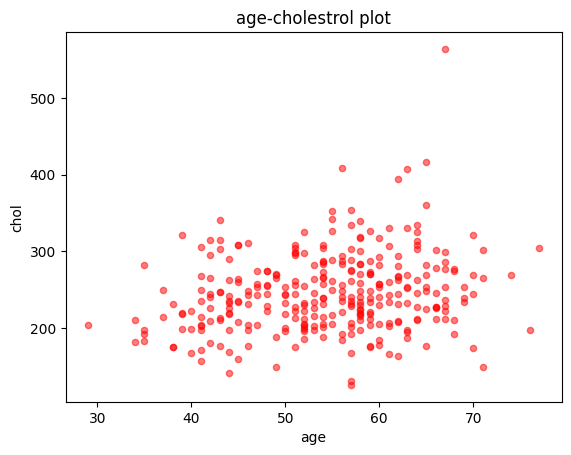

In [13]:
df.plot(kind='scatter', x='age',y='chol',alpha=0.5,color='red')
plt.xlabel('age')
plt.ylabel('chol')
plt.title('age-cholestrol plot')

In [16]:
df_new=pd.get_dummies(df,columns=['cp','thal'],drop_first=True)

In [27]:
y = df_new['target']
X = df_new.drop(['target'], axis = 1)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the SVC model
ml = svm.SVC()

# Correct the parameter grid
para_grid = {'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

# Initialize GridSearchCV with error_score set to 'raise'
grid = GridSearchCV(ml, para_grid, refit=True, verbose=1, cv=5, n_jobs=-1, error_score='raise')

# Fit GridSearchCV to the training data
grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [31]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [35]:
accuracy = grid_search.best_score_
accuracy

0.6364341085271319

In [38]:
y_test_hat=grid.predict(X_test)

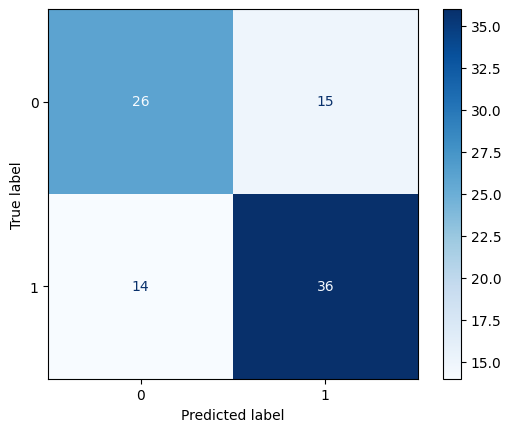

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_mat=confusion_matrix(y_test, y_test_hat)
disp= ConfusionMatrixDisplay(confusion_mat , display_labels=grid.classes_)
disp.plot(cmap=plt.cm.Blues , ax=plt.gca())
plt.show()

In [44]:
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64        41
           1       0.71      0.72      0.71        50

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.68      0.68      0.68        91

